# #03. 일반화된 선형 회귀 모델의 문제해결

이러한 다중공선성 문제를 해결하기 위한 2가지 방법 :
1. Ridge Regression : L2 규제화된 Linear Regression
2. Lasso Regression : L1 규제화된 LInear Regression

위 2가지 방법은 결국 작은 노이즈까지 학습하는 것을 방지하기 위해 
w(가중치)가 절대값이 커지는 것을 방지(규제)하는 방법을 사용합니다.

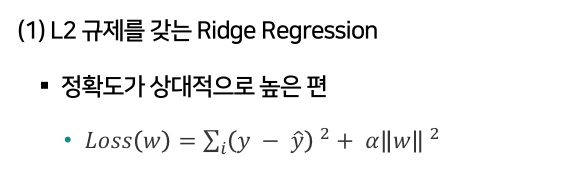

In [1]:
# 이미지 삽입
from IPython.display import Image
Image('img/img03_01.png', width=600)

### Ridge Regression 은 모델의 과적합을 방지하고 일반화 성능을 향상시키기 위해 사용하는 기법

> - 과적합 : 새로운 데이터나 테스트 데이터에 대한 일반화 성능이 떨어지는 현상
> - 과적합의 원인 : 복잡한 모델, 적은 데이터, 특성의 수가 많을 때, 훈련 데이터의 노이즈
> - 노이즈 : 데이터에서 유용한 신호나 패턴을 방해하는 임의적이고 무작위한 변동

####

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

결정계수 :  0.5763575677469706
평균절대오차 :  0.5328347307705183


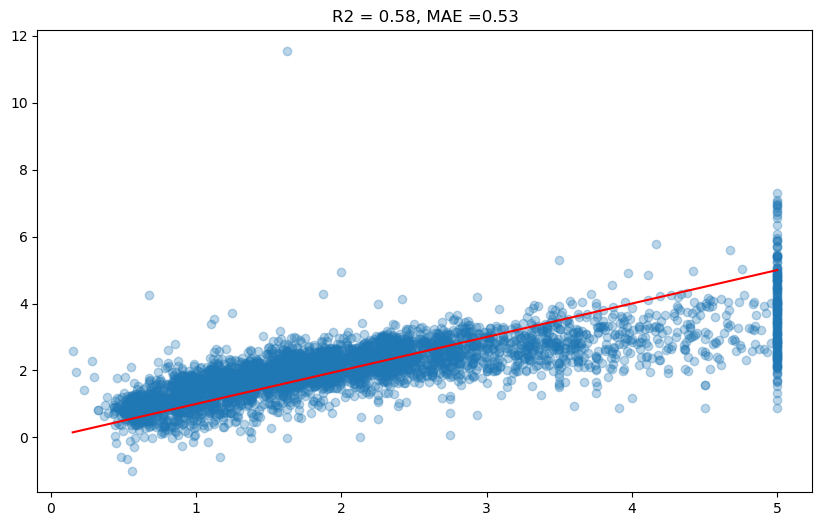

In [3]:
# 캘리포니아 주택가격 데이터셋 로드
california = fetch_california_housing()

# 특성과 타겟 변수를 분리
x, y = california.data, california.target

# **노이즈 추가 ( 10개의 노이즈 특성 )
noise = np.random.randint(5, 30, (x.shape[0], 10))
newX = np.hstack([noise, x])

# 훈련세트와 테스트세트로 분리
X_train, X_test, Y_train, Y_test = train_test_split(newX, y, test_size=0.2, random_state=42)

# 표준화 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ridge 회귀 모델 생성
ridge = Ridge()

# 교차검증에 사용하기 위한 alpha 값 찾기
param_grid = {'alpha' : np.logspace(-4, 4, 50)}

# cv=5 는 5겹 교차 검증 사용하여 모델 평가
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, Y_train)

# **최적의 alpha 값으로 모델 생성
best_alpha = grid_search.best_params_['alpha']
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, Y_train)

# 테스트 세트에 대한 예측
Y_pred = ridge_best.predict(X_test)

# 결정계수 R2
r2 = r2_score(Y_test, Y_pred)
print("결정계수 : " , r2)

# 평균절대오차 MAE
mae = mean_absolute_error(Y_test, Y_pred)
print("평균절대오차 : " , mae)

# 시각화
plt.figure(figsize=(10,6))
plt.scatter(Y_test, Y_pred, alpha=0.3)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], c='red')
plt.title("R2 = {:.2f}, MAE ={:.2f}" .format(r2, mae))
plt.show()

## =========================================================

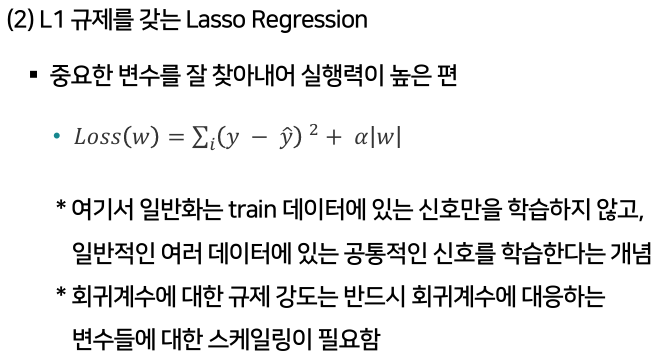

In [4]:
Image('Img/Img03_02.png', width=600)

### Lasso Regression 인 경우 중요하지 않은 변수는 0 으로 만든다.

결정계수 :  0.576956000933226
평균절대오차 :  0.533415523167515


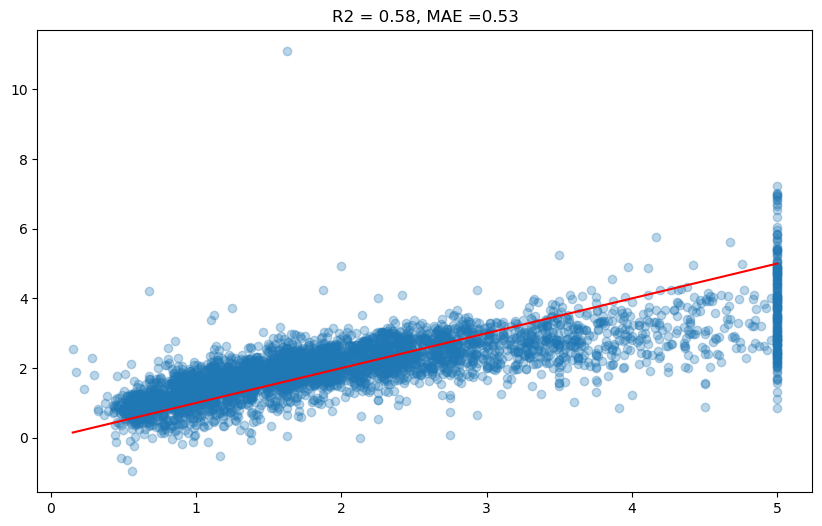

In [5]:
from sklearn.linear_model import Lasso

# 캘리포니아 주택가격 데이터셋 로드
california = fetch_california_housing()

# 특성과 타겟 변수를 분리
x, y = california.data, california.target

# **노이즈 추가 ( 10개의 노이즈 특성 )
noise = np.random.randint(5, 30, (x.shape[0], 10))
newX = np.hstack([noise, x])

# 훈련세트와 테스트세트로 분리
X_train, X_test, Y_train, Y_test = train_test_split(newX, y, test_size=0.2, random_state=42)

# 표준화 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Lasso 회귀 모델 생성
lasso = Lasso()

# 교차검증에 사용하기 위한 alpha 값 찾기
param_grid = {'alpha' : np.logspace(-4, 4, 50)}

# cv=5 는 5겹 교차 검증 사용하여 모델 평가
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, Y_train)

# **최적의 alpha 값으로 모델 생성
best_alpha = grid_search.best_params_['alpha']
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train, Y_train)

# 테스트 세트에 대한 예측
Y_pred = lasso_best.predict(X_test)

# 결정계수 R2
r2 = r2_score(Y_test, Y_pred)
print("결정계수 : " , r2)

# 평균절대오차 MAE
mae = mean_absolute_error(Y_test, Y_pred)
print("평균절대오차 : " , mae)

# 시각화
plt.figure(figsize=(10,6))
plt.scatter(Y_test, Y_pred, alpha=0.3)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], c='red')
plt.title("R2 = {:.2f}, MAE ={:.2f}" .format(r2, mae))
plt.show()